# Linear Regression usando gradiente descendente 

## Hay 4 supociciones que justifican el uso de modelos de regresión lineal para fines de  predicción:



1. Relacion de linealidad y aditividad entre variables dependientes e independientes:
   *  El valor esperado de la variable dependiente es una función de línea recta de cada variable independiente, manteniendo las otras fijas. En otras palabras la pendiente de esa línea no depende de los valores de las otras variables. Los efectos de diferentes variables independientes sobre el valor esperado de la variable dependiente son aditivos.
   
2. Independencia estadística de los errores (en particular, no hay correlación entre errores consecutivos en el caso de datos de series de tiempo)

3. Homoscedasticidad (varianza constante) de los errores.

    * versus tiempo (en el caso de datos de series de tiempo)

    * versus las predicciones

    * versus cualquier variable independiente

4. Normalidad de la distribución del error.

http://people.duke.edu/~rnau/testing.htm


##Relizar el tutorial de Intro a Matplotlib de 
https://colab.research.google.com/notebooks/welcome.ipynb

## Contruyendo  J($\theta$) y GD
Vamos a utilizar un solo valor, el alcohol, para predecir la calidad y convertir las cosas en un modelo más complejo que incluya mas variables.
Comencemos con el análisis del contenido de alcohol y su relacion con la  calidad y veamos qué tan bien concuerda.

In [0]:
import pandas as pd
import numpy as np


data = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

data.head()

data.describe()

data.hist('citric acid')

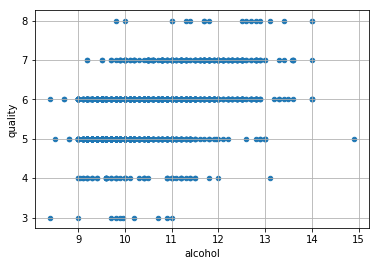

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

data.plot(kind="scatter", x="alcohol", y="quality", grid=True)
plt.show()

In [0]:
def Jcost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [0]:
alpha = 0.01
iters = 1000
def gradientDescent(X, y, theta, alpha, iters):
    
    # Definir la matriz temporal para theta.
    temp = np.matrix(np.zeros(theta.shape))
    
    # # Número de parámetros para iterar
    parameters = int(theta.ravel().shape[1])
    
    # Vector de costos para ver cómo progresa a través de cada paso.
    cost = np.zeros(iters + 1)
    cost[0] = Jcost(X, y, theta)
    
    # Calcula el error en cada iter
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i + 1] = Jcost(X, y, theta)
        
    return theta, cost

In [0]:
X = pd.DataFrame(data['alcohol'])
X['x_0'] = 1
y = data['quality']

X = np.matrix(X.values)
y = np.matrix(y.values).T
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))

In [10]:
print(X.shape, y.shape, theta.shape)

Jcost(X, y, theta)



(1599, 2) (1599, 1) (1, 2)


16.20825515947467

In [11]:
theta_final, cost = gradientDescent(X, y, theta, alpha, iters)
Jcost(X, y, theta_final)

0.2660076719790539

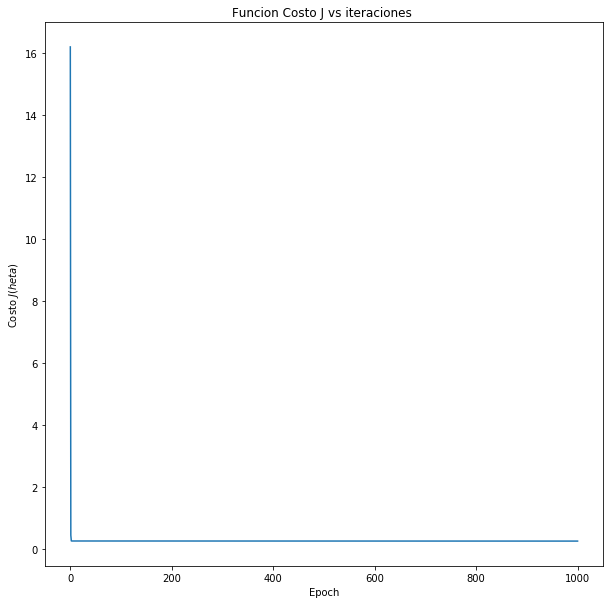

In [12]:
plt.figure(figsize=(10,10))
plt.xlabel("Epoch")
plt.ylabel("Costo $J(\theta$)")
plt.plot(cost)
plt.title("Funcion Costo J vs iteraciones ")
plt.show()

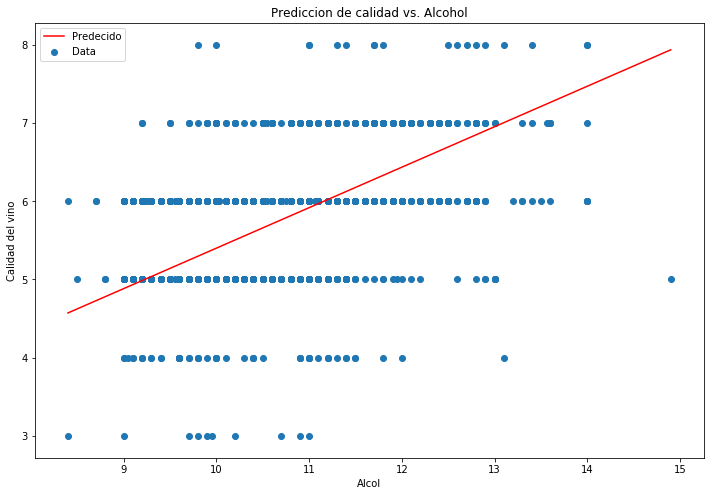

In [13]:
x = np.linspace(data.alcohol.min(), data.alcohol.max(), 100)
y_gen = theta_final[0,1] + theta_final[0,0] * x 


fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y_gen, 'r', label='Predecido')
ax.scatter(data.alcohol, data.quality, label='Data')
ax.legend(loc=2)
ax.set_xlabel('Alcol')
ax.set_ylabel('Calidad del vino')
ax.set_title('Prediccion de calidad vs. Alcohol')
plt.show()

In [14]:
#NormaLizando para hacer analisis multivariable
data_z = (data - data.mean()) / data.std()
data_z.describe()

sigma = data.std()
mu = data.mean()

print(sigma)
print(mu)

fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


In [15]:
# Incluye x_0 
data_z['x_0'] = 1

X = data_z.drop(['quality'], axis=1)
y = data_z['quality']

X = np.matrix(X.values)
y = np.matrix(y.values).T
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))

print(X.shape, y.shape, theta.shape)

(1599, 12) (1599, 1) (1, 12)


In [16]:
theta_final, cost = gradientDescent(X, y, theta, alpha, iters)

for i in range(0, theta_final.shape[1] - 1):
    print(data_z.columns[i], theta_final.T[i])
    
Jcost(X, y, theta_final)

fixed acidity [[0.07643899]]
volatile acidity [[-0.23250415]]
citric acid [[-0.03256903]]
residual sugar [[0.0379982]]
chlorides [[-0.11097073]]
free sulfur dioxide [[0.05568745]]
total sulfur dioxide [[-0.13376176]]
density [[-0.07123053]]
pH [[-0.0624788]]
sulphates [[0.19712703]]
alcohol [[0.34483693]]


0.31962101116122116

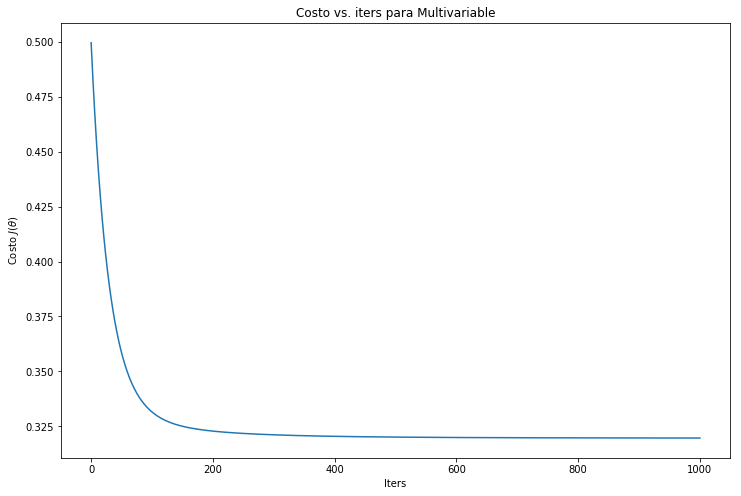

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlabel("Iters")
ax.set_ylabel(r"Costo $J(\theta)$")
ax.plot(cost)
ax.set_title("Costo vs. iters para Multivariable")
plt.show()

In [0]:
# x_norm es el dominio normalizado para usar para predicciones
x_norm = np.ones((100, X.shape[1]))
for i in range(1, x_norm.shape[1]):
    x_norm[:,i] = np.linspace(X[:,i].min(), X[:,i].max(), 100)

# y_norm son los valores predichos normalizados
y_norm = x_norm * theta_final.T

In [0]:
#Regresando a las variables originales utilizando la desviación estandar y los valores promedio calculados anteriormente

y_orig = y_norm * sigma[len(sigma) - 1] + mu[len(mu) - 1]
x_orig = x_norm
# First column is intercepts
x_orig[:,0:(len(sigma) - 1)] = x_norm[:,0:(len(sigma) - 1)] * np.atleast_2d(sigma[0:(len(sigma) - 1)]) + np.atleast_2d(mu[0:(len(sigma) - 1)])

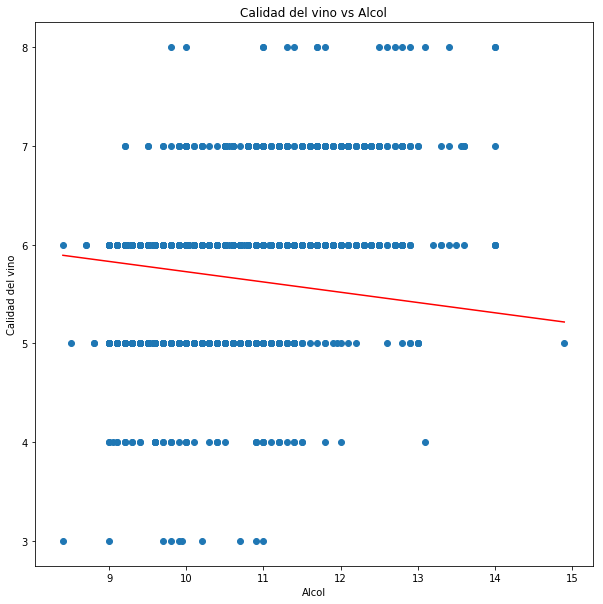

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x_orig[:,10], y_orig, 'r', label='Predecido')
ax.scatter(data.alcohol, data.quality, label='Data')
ax.set_xlabel("Alcol")
ax.set_ylabel("Calidad del vino")
ax.set_title("Calidad del vino vs Alcol")
plt.show()

In [21]:
# Usa los datos  para calcular R-squared
y_orig_2 = np.ravel(X * theta_final.T * sigma[len(sigma) - 1] + mu[len(mu) - 1])
num = np.sum((data.quality - y_orig_2) ** 2)
den = np.sum((data.quality - data.quality.mean()) ** 2)
r_squared = 1 - num / den
r_squared

0.36035795138073934

# Usando directamente SKlearn

In [22]:
from sklearn.linear_model import LinearRegression

X = data.drop(['quality'], axis=1)
y = data['quality']
lm = LinearRegression(fit_intercept=True, normalize=True)
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [0]:
X_ = np.matrix(X.values)
x_gen = np.zeros((100, X.shape[1]))
for i in range(X.shape[1]):
    x_gen[:,i] = np.linspace(X_[:,i].min(), X_[:,i].max(), 100)
y_gen= lm.predict(x_gen)

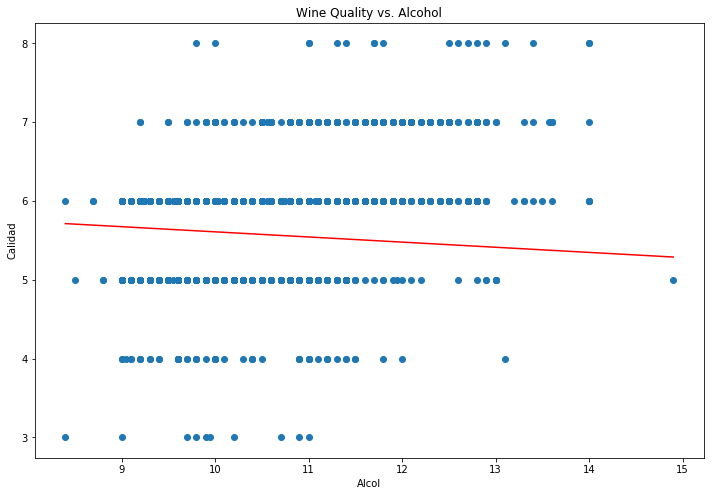

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(data.alcohol, data.quality, label='Data')
plt.plot(x_gen[:,10], y_gen, 'r', label='predecido por Sklearn')
plt.xlabel("Alcol")
plt.ylabel("Calidad")
plt.title("Wine Quality vs. Alcohol")
plt.show()

In [25]:
lm.score(X, y)

0.36055170303868833